In [730]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [731]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


test_1 = pd.read_csv('gender_submission.csv')

# EDA of Titanic Data 

In [732]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [733]:
train.shape

(891, 12)

In [734]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [735]:
test.shape

(418, 11)

In [736]:
test_1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [737]:
test_1.shape

(418, 2)

In [738]:
test_1 = pd.merge(test, test_1, on ='PassengerId', how ='left')

In [739]:
test_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [740]:
train_1 = pd.concat([train, test_1])

In [741]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [742]:
train_1.shape

(1309, 12)

In [743]:
# now we have a complete dataset to work with 

In [744]:
# lets set ourselves some questions to answer: 

# Question 1 - what is percentage of survived and not survived? 

In [745]:
(train_1[train_1['Survived'] == 1].sum()[1]) / (train_1.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


37.73873185637891

In [746]:
# approx 38% survived the Titanic sinking 

In [747]:
# Question 2 - what was the gender split for surviving? 

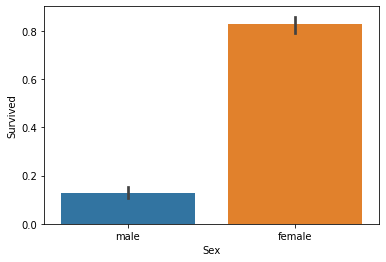

In [748]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_1)

In [749]:
# Question 3 - what was the gender split for not surviving? 

In [750]:
train_1['did_not_survive'] = train_1['Survived'].replace([0,1], [1,0])

In [751]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,did_not_survive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


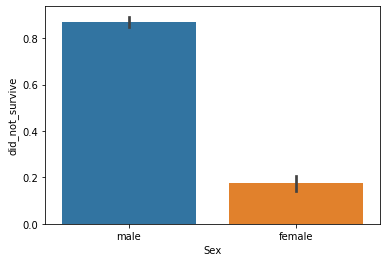

In [752]:
sns.barplot(x = 'Sex', y = 'did_not_survive', data = train_1)

In [753]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,did_not_survive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [754]:
train_1.drop(columns =['did_not_survive'], inplace = True)

In [755]:
# Question 4 - What was the gender split in surviving among the classes? 

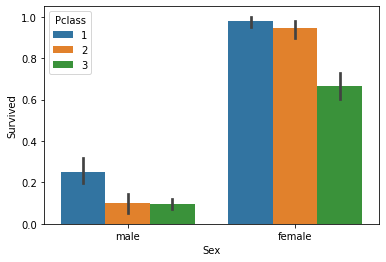

In [756]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_1)

In [757]:
# Question 5 - what was the percentage of surviving in which class? 

In [758]:
class1 = train_1[train_1['Pclass'] == 1]

In [759]:
class1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [760]:
class2 = train_1[train_1['Pclass'] == 2]

In [761]:
class2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [762]:
class3 = train_1[train_1['Pclass'] == 3]

In [763]:
class3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [764]:
# lets find these percentages class by class. 

In [765]:
class1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [766]:
# percentage of surviving within the class 1

In [767]:
(class1[class1['Survived'] == 1].sum()[1] / class1.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


57.585139318885446

In [768]:
# percentage of surviving against all, if you were class 1 

In [769]:
(class1[class1['Survived'] == 1].sum()[1] / train_1.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


14.209320091673034

In [770]:
# percentage of surviving within the class 2

In [771]:
(class2[class2['Survived'] == 1].sum()[1] / class2.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


42.238267148014444

In [772]:
# percentage of surviving against all, if you were class 2

In [773]:
(class2[class2['Survived'] == 1].sum()[1] / train_1.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


8.938120702826586

In [774]:
# percentage of surviving within the class 3

In [775]:
(class3[class3['Survived'] == 1].sum()[1] / class3.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


26.939351198871652

In [776]:
# percentage of surviving against all, if you were class 3

In [777]:
(class3[class3['Survived'] == 1].sum()[1] / train_1.shape[0]) * 100

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


14.591291061879296

In [778]:
# there will understandably be lots of variables in play here, especially with percentages.

# ie the amount of first class and third class passengers, their location of quarters on the ship etc 

# Clean the train dataset 

In [779]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [780]:
# need to group by here and replace the null fares with their corresponding class 

In [781]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [782]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [783]:
train['Fare'] = np.where((train.Pclass == 1), 84, train.Fare)
train['Fare'] = np.where((train.Pclass == 2), 21, train.Fare)
train['Fare'] = np.where((train.Pclass == 3), 14, train.Fare)

In [784]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [785]:
# get rid of 0's in train.Fare

# becasue we can't have 0's in our model 

In [786]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [787]:
# see what data types are 

In [788]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [789]:
# change the sex so 1 = male and 0 = female 

In [790]:
train['Sex'].replace(['male', 'female'], [1,0], inplace = True)

In [791]:
# need to sort out nulls 

In [792]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [793]:
# so we can see that the only column we want to investigate with nulls in is the age. 

# my initial reaction is to imput the average age 

# might extend this to the average age of the class, gender etc

In [794]:
train.Age.mean()

29.69911764705882

In [795]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.564815,38.233441,0.416667,0.356481,84.0
2,445.956522,0.472826,0.586957,29.877630,0.402174,0.380435,21.0
3,439.154786,0.242363,0.706721,25.140620,0.615071,0.393075,14.0


In [796]:
# so here we can see there is a little bit more disparity for of ages when compared to the class they are in. 

# lets find the nulls

In [797]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,14.0,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,21.0,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,14.0,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,14.0,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,14.0,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,14.0,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,14.0,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,14.0,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,14.0,NaN,S


In [798]:
# need to create some sort of import if class = x than age = y 

In [799]:
train['Age'] = np.where((train.Pclass == 1), 38, train.Age)
train['Age'] = np.where((train.Pclass == 2), 30, train.Age)
train['Age'] = np.where((train.Pclass == 3), 25, train.Age)

In [800]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [801]:
# we have replaced the nulls with the appropriate ages when considering their class 

# Clean the test dataset

In [802]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [803]:
# there is only one nullin fare and we need to sort the nulls for age too 

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [804]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [805]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [806]:
# I am inputting an average value of a third class ticket as this row is stopping me from building a model 

test.Fare.iloc[152] = 13.7

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [807]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         13.7
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [808]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [809]:
# looks like it is just null ages again, will use same methodology as before

In [810]:
test['Age'] = np.where((test.Pclass == 1), 38, test.Age)
test['Age'] = np.where((test.Pclass == 2), 30, test.Age)
test['Age'] = np.where((test.Pclass == 3), 25, test.Age)

In [811]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Building the model 

In [812]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = train[feature_cols]
y = train.Survived

In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [814]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [815]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [816]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


# Evaluate the Model

In [817]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [818]:
cnf_matrix

array([[95, 15],
       [21, 48]], dtype=int64)

In [819]:
# top left and bottom right = true positive and true negative 

# bottom left and top right = false positive and false negative

<function matplotlib.pyplot.show(*args, **kw)>

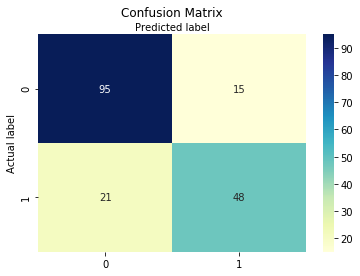

In [820]:
class_names = [0,1]


fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g') 
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [821]:
# top left and bottom right = true positive and true negative 

# bottom left and top right = false positive and false negative

In [822]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [823]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.7988826815642458
Precision 0.7619047619047619
Recall 0.6956521739130435


Bottom line is: 
- Accuracy value of 80%: of all the predictions we got 80% of them correct - but we don't know whether this is yes' or no's 
- Precision value of 76%: means that 76% of the labelled / predicted as surviving are correct 
- Recall value of 70%: means that of all surviving people, we labelled 70% correclty and others we didn't 

## Can I improve these scores by adapting the featured columns (variables in the model)

In [824]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,25.0,1,0,A/5 21171,14.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,84.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,25.0,0,0,STON/O2. 3101282,14.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,38.0,1,0,113803,84.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,25.0,0,0,373450,14.0,NaN,S


In [825]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.184063,0.523008,0.381594,32.415264
std,257.353842,0.486592,0.836071,0.477990,5.353337,1.102743,0.806057,29.323043
min,1.000000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,14.000000
25%,223.500000,0.000000,2.000000,0.000000,25.000000,0.000000,0.000000,14.000000
50%,446.000000,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,1.000000,30.000000,1.000000,0.000000,21.000000
max,891.000000,1.000000,3.000000,1.000000,38.000000,8.000000,6.000000,84.000000


In [826]:
# seeing what columns to exlude:

train.corrwith(train['Survived'])


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age            0.333016
SibSp         -0.035322
Parch          0.081629
Fare           0.301679
dtype: float64

In [827]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare']

X = train[feature_cols]
y = train.Survived

In [828]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [829]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [830]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [831]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [832]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

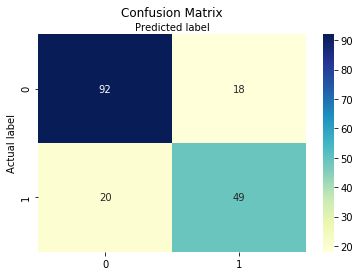

In [833]:
class_names = [0,1]


fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [834]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [835]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.7877094972067039
Precision 0.7313432835820896
Recall 0.7101449275362319


#### previous results were: 

- Accuracy 0.7988826815642458
- Precision 0.7619047619047619
- Recall 0.6956521739130435

In [836]:
# you can see that the changes in the models performance is negligible

# we will stick to this new model

# Using new model to predict

# now predict with the test dataframe 

In [837]:
X_test

,Pclass,Sex,Age,Fare
495,3,1,25.0,14.0
648,3,1,25.0,14.0
278,3,1,25.0,14.0
31,1,0,38.0,84.0
255,3,0,25.0,14.0
...,...,...,...,...
780,3,0,25.0,14.0
837,3,1,25.0,14.0
215,1,0,38.0,84.0
833,3,1,25.0,14.0


In [838]:
test['Sex'].replace(['male', 'female'], [1,0], inplace = True)

In [839]:
test[test['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",1,38.0,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",1,38.0,0,0,112058,0.0,B52 B54 B56,S


In [840]:
test.Fare.iloc[372]

0.0

## We want to imput a mean onto these two Fares

In [841]:
# I need to input a value for rows 266 and 372. I'll input the average fare for passengers in class 1. 
# This average Fare was 84

test.Fare.iloc[266] = 84
test.Fare.iloc[372] = 84

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [842]:
test.shape

(418, 11)

In [843]:
test[test['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [844]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.440191,0.447368,0.392344,35.976645
std,120.810458,0.841838,0.481622,5.401617,0.896760,0.981429,55.895680
min,892.000000,1.000000,0.000000,25.000000,0.000000,0.000000,3.170800
25%,996.250000,1.000000,0.000000,25.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,25.000000,0.000000,0.000000,14.456250
75%,1204.750000,3.000000,1.000000,38.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,38.000000,8.000000,9.000000,512.329200


In [845]:
test_pred = test[['Pclass', 'Sex', 'Age', 'Fare']]

In [846]:
y_pred = logreg.predict(test_pred)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [847]:
df = pd.DataFrame({'PassengerId' : test.PassengerId, 'Actual' : test.Name, 'Predicted' : y_pred})
df

,PassengerId,Actual,Predicted
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",1
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...,...
413,1305,"Spector, Mr. Woolf",0
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",0
416,1308,"Ware, Mr. Frederick",0


In [848]:
test_2 = pd.read_csv('gender_submission.csv')

In [849]:
test_2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [850]:
test_2.shape

(418, 2)

In [851]:
# now I want to combine what my model predicted and what actually happened to the individual to see how it did. 

In [852]:
inner_join = pd.merge(df, test_2, on ='PassengerId', how ='inner')

inner_join

,PassengerId,Actual,Predicted,Survived
0,892,"Kelly, Mr. James",0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,1
2,894,"Myles, Mr. Thomas Francis",0,0
3,895,"Wirz, Mr. Albert",0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1
...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,0
414,1306,"Oliva y Ocana, Dona. Fermina",1,1
415,1307,"Saether, Mr. Simon Sivertsen",0,0
416,1308,"Ware, Mr. Frederick",0,0


In [853]:
inner_join['comparison_column'] = np.where(inner_join["Predicted"] == inner_join["Survived"], True, False)

In [854]:
inner_join.head()

,PassengerId,Actual,Predicted,Survived,comparison_column
0,892,"Kelly, Mr. James",0,0,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,1,True
2,894,"Myles, Mr. Thomas Francis",0,0,True
3,895,"Wirz, Mr. Albert",0,0,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,True


In [855]:
inner_join[inner_join['comparison_column'] == True].sum()

PassengerId                                                     412717
Actual               Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Predicted                                                          139
Survived                                                           139
comparison_column                                                  374
dtype: object

In [856]:
# looks like my model did very well at predicting who survived! 

## Creating sumbission file for kaggle 

In [857]:
inner_join.head()

,PassengerId,Actual,Predicted,Survived,comparison_column
0,892,"Kelly, Mr. James",0,0,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,1,True
2,894,"Myles, Mr. Thomas Francis",0,0,True
3,895,"Wirz, Mr. Albert",0,0,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,True


In [858]:
inner_join.drop(columns = ['Actual', 'Survived', 'comparison_column'], inplace = True)

In [859]:
inner_join.head()

,PassengerId,Predicted
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [860]:
inner_join.rename(columns = {'Predicted' : 'Survived'}, inplace = True)

In [861]:
inner_join.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [862]:
inner_join.to_csv("Submission.csv", index=False)

In [863]:
inner_join.shape

(418, 2)

In [864]:
# should be okay to upload to kaggle now 